# matplotlib包的使用

## 程序的基本结构

In [1]:
import matplotlib.pyplot as plt
import numpy as np

创建显示的数据源，可以使用列表或者数组

In [2]:
x = np.linspace(-1, 1, 50)
y = 2 * x + 1

画图

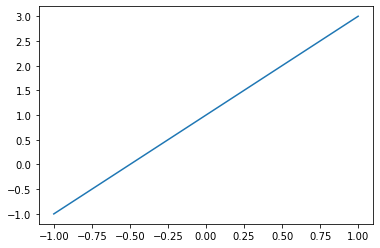

In [3]:
plt.plot(x, y)
plt.show()

如果向 `plot()` 命令中只提供一个列表或者数组，则 `matplotlib` 默认他是一个 `y` 值序列，自动生成 `x` 值，默认 `x` 与 `y` 具有相同的长度，但是从 `0` 开始。

如 `plt.plot([1,2,3,4])` 等价于 `plt.plot([0,1,2,3],[1,2,3,4])`。

- **同一张图里显示两个函数**

In [4]:
x = np.linspace(-5, 5, 50)
y1 = 2 * x + 10
y2 = x ** 2

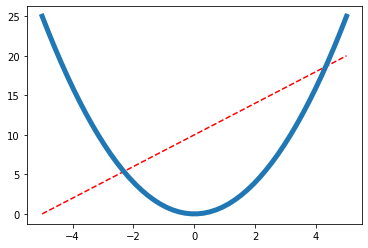

In [5]:
plt.plot(x, y1, 'r--')
plt.plot(x, y2, linewidth=5)
plt.show()

- **matplotlib 画图的结构**

`matplotlib` 存在 `figure` 的概念，理解为画布，在画布中又可以存在小图 `subplot`。

`axes` 被译为轴域，是图形的一部分（两条坐标轴围成的区域），个人理解 `subplot` 之后获得的就是当前的 `axes`。

`gca` = `get current axes`  `gca` = `get current figure`

plt.figure()命令是可选的，默认创建figure(1)，

如果不指定轴域，则默认创建subplot(1,1,1)

## 多幅图

- **均匀分割**

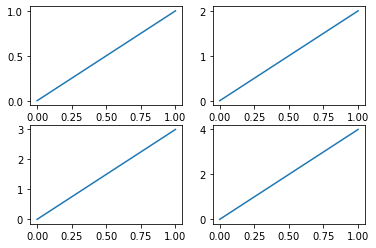

In [6]:
plt.figure()

# 第一个axes
plt.subplot(2, 2, 1)  # 可以简写为 plt.subplot(221),不喜欢这种写法
plt.plot([0, 1], [0, 1])

# 第二个axes
plt.subplot(2, 2, 2)
plt.plot([0, 1], [0, 2])

# 第三个axes
plt.subplot(2, 2, 3)
plt.plot([0, 1], [0, 3])

# 第四个axes
plt.subplot(2, 2, 4)
plt.plot([0, 1], [0, 4])

plt.show()

- **不均匀分割**

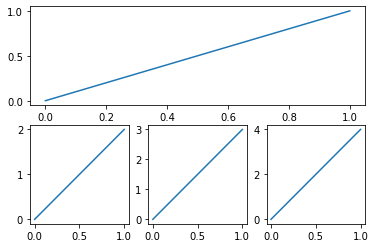

In [7]:
plt.figure()

# 注意subplot中的参数
plt.subplot(2, 1, 1)  # 分成两行，第一行分1列，然后占用的是1,2,3
plt.plot([0, 1], [0, 1])

plt.subplot(2, 3, 4)  # 分两行，第二行分3列，然后是第二行起始为4
plt.plot([0, 1], [0, 2])

plt.subplot(2, 3, 5)
plt.plot([0, 1], [0, 3])

plt.subplot(2, 3, 6)
plt.plot([0, 1], [0, 4])

plt.show()

## 图的装饰

坐标轴的显示区域，标签，线条的颜色等

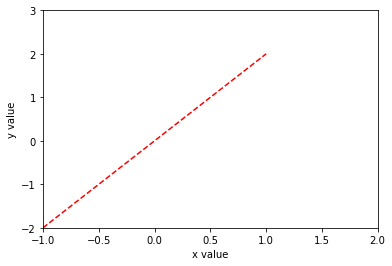

In [8]:
x = np.linspace(-1, 1, 50)
y1 = 2 * x

plt.figure()
plt.plot(x, y1, 'r--')

plt.xlabel('x value')
plt.ylabel('y value')

plt.axis([-1, 2, -2, 3])
# 设置可视区域也可以使用下面的表达
# plt.xlim((-1, 2))
# plt.ylim((-2, 3))

plt.show()

使用坐标图例代替数字

[-1.   -0.25  0.5   1.25  2.  ]


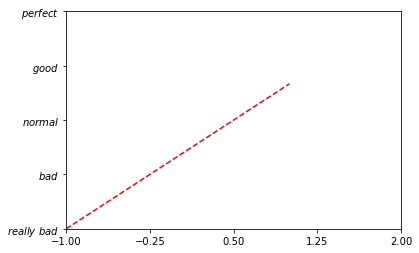

In [9]:
x = np.linspace(-1, 1, 50)
y1 = 2 * x

plt.figure()
plt.plot(x, y1, 'r--')

plt.xlim((-1, 2))
plt.ylim((-2, 3))

new_ticks = np.linspace(-1, 2, 5)
print(new_ticks)
plt.xticks(new_ticks)
# 这里额外使用了latex语法
plt.yticks([2 * _ for _ in new_ticks],
           [r'$really\ bad$', r'$bad$', r'$normal$', r'$good$', r'$perfect$'])

plt.show()

网上的例子，比较花里胡哨，我也用不到这么高端的功能

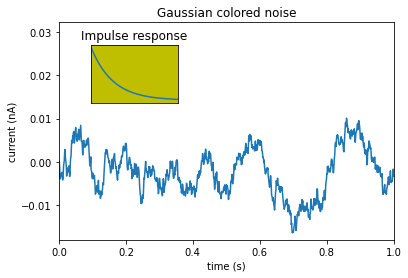

In [10]:
# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000] / 0.05)  # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)] * dt  # colored noise

# the main axes is subplot(111) by default
plt.plot(t, s)
plt.axis([0, 1, 1.1 * np.amin(s), 2 * np.amax(s)])
plt.xlabel('time (s)')
plt.ylabel('current (nA)')
plt.title('Gaussian colored noise')

# this is another inset axes over the main axes
a = plt.axes([0.2, 0.6, .2, .2], facecolor='y')
plt.plot(t[:len(r)], r)
plt.title('Impulse response')
plt.xlim(0, 0.2)
plt.xticks([])
plt.yticks([])

plt.show()

## 画几何图形

各种预设的几何形状在Matplotlib中patches中

- 利用Circle这个函数产生了一个圆；
- 然后把这个圆加入到当前轴域中
- 测试之后存在问题，显示的坐标轴比较小，因此又加了个坐标轴的可视范围

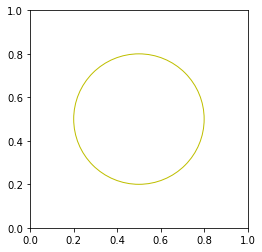

In [11]:
from matplotlib.patches import Circle

circle = Circle((0.5, 0.5), 0.3, color='y', fill=False)
plt.gcf().gca().add_artist(circle)

plt.axis('scaled')  # 也可以用equal
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()